# CSINTSY - Machine Learning Model
### Title: Machine Learning Analysis on Crop Recommendation

### Members: Cruzada, Escalona, Francisco, Loyola

### Section and Group CSINTSY S14 MCO5

---

## Introduction

Different crops can be produced with different amounts of nitrogen, phosphorus, potassium in soil, and varying measures of temperature, humidity, soil reaction (pH), and rainfall. 

Nitrogren is responsible for increasing the yield and quantity of crops. When the nitrogren rate is increased, so does its yield. Furthermore, phosphorus and potassium have roles in maintaining the crop. Phosphorus is the major component in the RNA and DNA of a plant and plays a role in root developmnt, crop maturity, and seed production while Potassium increases water use efficiency and transforms sugars to starch in the grain-filling process. In addition, Potassium allows plants to withstand extreme hot and cold temperatures, drought, and pests. 

Temperature in the context of crop production is the measure of intensity of heat energy. As a result, it influences the distribution of crop plants and vegetation. As for the humidity, it influences the water requirement of crops. Soil reaction (pH) is the hydrogen ion concentration of the soil. This affects crop growth as a low pH interferes with the availability of other plant nutrients. Finally, rainfall is one of the most important factors that influences the crop production. Different crops grow in heavy and low rainfall areas. However, it is important to note that yields are not always directly proportional to the amount of rainfall.

### Motivation 
It is important to be informed about the different crops that can be produced with varying levels of different factors mentioned above to maximize crop production and agricultural productivity. If these were not identified, the time, money, and effort invested into growing a certain crop could be wasted because of an unfulfilled condition in cultivating the said crop. Hence, the question to be answered using **K-Nearest Neighbor Algorithm** and **Decision Tree** is:

#### *What crops will be produced given the different levels of nitrogen, phosphorus, potassium in soil, temperature, humidity, pH, and rainfall?*

### Benefits
**<< Then, enumerate or explain the possible benefits if the problem is solved. >>**

## Dataset

The dataset was obtained through the data science and dataset sharing platform of Kaggle. It was uploaded by a user named Abhishek Kumar who also had other datasets aside from the crops recommendation dataset. The dimensions of the dataset contains 8 columns with 2200 rows which meets the requirment of the dataset having a minimum of at least 1000 datapoints.

The features of the dataset are environmental parameters to which the crop is ideal to grow in to. These features are as follows:

- **`Nitrogen levels`** :  Represents the amount of nitrogen (in kg/ha) present in the soil for the crop
- **`Phosphorus levels`** : Represents the amount of phosphorus (in kg/ha) present in the soil for the crop
- **`Potassium levels`** :  Represents the amount of potassium (in kg/ha) present in the soil for the crop
- **`Temperature`** : Represents the average temperature (in Celsius) during the crop's growing period
- **`Humidity levels`** : Represents the average relative humidity (in percentage) during the crop's growing period
- **`pH levels`** :  Represents the soil pH during the crop's growing period
- **`Rainfall levels`** : Represents the amount of rainfall (in mm) received during the crop's growing period

The combination of these features results to certain 'environments' that a certain kind of crop may be suitable to grow in, thus each datapoint is equally labelled with a crop that is deemed to grow well at that kind of environment. The labels of these crops are as follows:
1. Rice
2. Maize
3. Chickpea
4. Kidneybeans
5. Pigeonpeas
6. Mothbeans
7. Mungbean
8. Blackgram
9. Lentil
10. Pomegranate
11. Banana
12. Mango
13. Grapes
14. Watermelon
15. Muskmelon
16. Apple
17. Orange
18. Papaya
19. Coconut
20. Cotton
21. Jute
22. Coffee

The dataset will be divided into two segments for use which are for training and testing data. The ratio between the training and testing data will be 2000:200 from the original 2200. The test data will be randomly selected through the use of a seeded random selector for consistency on every runtime.

## ML Methods Used

The machine learning methods used are ones that are capable of multi-label classification techniques. This is for the reason that the dataset labels the different combination of environmental parameters to an appropriate type of crop of different kinds (i.e., multiple labels). Among the techniques used are the following:
1. K-Nearest Neighbor Classifier
2. Decision Tree Classifier

## References

- https://www.noble.org/news/publications/ag-news-and-views/2007/january/back-to-basics-the-roles-of-n-p-k-and-their-sources/
- http://eagri.org/eagri50/AGRO101/lec09.pdf
- https://www.kaggle.com/datasets/aksahaha/crop-recommendation

# Experiment Proper

## 1. Importing and cleaning data.

### 1.1 Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

### 1.2 Load Raw Data

The training data shows 8 unique columns which represent certain parameters. With the exception of the `label` parameter, these parameters are the environmental variables that are required in the growth of a certain crop which are the levels of `nitrogen`, `phosphorus`, `potassium`, `temperature` (in C), `humidity`, `ph`, and `rainfall`.

In [5]:
# Load Training data
crops_df = pd.read_csv('Crop_recommendation.csv')
crops_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### 1.2.1 Check for missing data

In [6]:
crops_df.isnull().any()

nitrogen       False
phosphorus     False
potassium      False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

#### 1.2.2 Check for duplicate data

In [7]:
crops_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

#### 1.2.3 Check for incorrect datatype

In [8]:
crops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### 1.2.4 Determine Features

In [9]:
FEATURES = crops_df.keys().tolist()[0:-1]
FEATURES

['nitrogen',
 'phosphorus',
 'potassium',
 'temperature',
 'humidity',
 'ph',
 'rainfall']

#### 1.2.5 Determine Unique Crop Labels

In [10]:
#Determine the list of unique crops
labels = crops_df["label"].unique()
print("No. of unique crop labels: ", labels.size)
print(labels)

No. of unique crop labels:  22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


### 1.3 Divide Training Data from Test Data

With a original dataset having 2200 rows or data points, it is possible to retrive at most 200 test samples to be used for testing with the remaining 2000 for training.

In [11]:
random_seed = 1 #Prevents the test_data from being 'too random' on different runtimes.
test_data = crops_df.sample(n=200, random_state=random_seed)
training_data = pd.concat([crops_df,test_data]).drop_duplicates(keep=False)

### 1.4 Data Visualization

This section shows the relationships of certain pairs or groups of features that is found in the dataset.

#### 1.4.1 Nitrogen, Phosphorus, Potassium Relationship

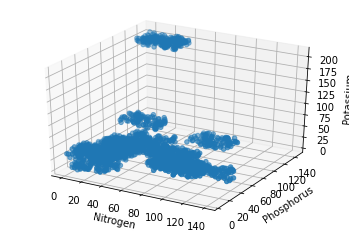

In [12]:
nppr_graph = plt.figure()
nppr_graph_ax = plt.axes(projection='3d')
nppr_graph_ax.scatter3D(crops_df['nitrogen'],crops_df['phosphorus'], crops_df['potassium'])
nppr_graph_ax.set_xlabel('Nitrogen')
nppr_graph_ax.set_ylabel('Phosphorus')
nppr_graph_ax.set_zlabel('Potassium')
plt.show()

#### 1.4.2 Temperature, Humidity, Rainfall Relationship

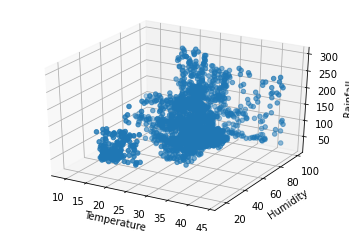

In [13]:
thrr_graph = plt.figure()
thrr_graph_ax = plt.axes(projection='3d')
thrr_graph_ax.scatter3D(crops_df['temperature'],crops_df['humidity'], crops_df['rainfall'])
thrr_graph_ax.set_xlabel('Temperature')
thrr_graph_ax.set_ylabel('Humidity')
thrr_graph_ax.set_zlabel('Rainfall')
plt.show()

## 2. Use of Machine Learning

### 2.1 K-Nearest Neighbor (KNN) Algorithm

**<< A brief explanation of KNN >>**

#### 2.1.1 Loading Training and Test Data

Create separate copies of training and test data for exclusive use of K Neighbor Classifier

In [11]:
#Load training data
kn_training = training_data

# Load test data
kn_test = test_data

#### 2.1.2 Load and 'Train' K Neighbors Classifier

In [12]:
# Using the features, define what type of crop it is
x = kn_training[FEATURES].copy()
y = kn_training['label']

knn = KNeighborsClassifier(n_neighbors=3) #Uses number of labels
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

#### 2.1.3 Test Predictions

In [13]:
# The prediction column shows the prediction of the K Neighbor algo
kn_test['prediction'] = knn.predict(kn_test[FEATURES])
kn_test

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,prediction
1276,25,129,195,17.986678,81.177121,5.777271,72.371277,grapes,grapes
1446,106,20,51,29.730197,90.970157,6.342573,20.490356,muskmelon,muskmelon
335,33,59,22,22.642369,21.593961,5.947000,122.388601,kidneybeans,kidneybeans
1458,89,9,47,29.471563,90.770696,6.668383,28.752261,muskmelon,muskmelon
2038,62,49,37,24.217446,82.852840,7.479248,166.136589,jute,jute
...,...,...,...,...,...,...,...,...,...
614,21,38,21,29.755389,86.451933,6.637677,37.546027,mungbean,mungbean
885,28,67,21,21.797926,63.730861,6.250994,46.623702,lentil,lentil
1259,17,136,195,41.207336,81.610510,6.389783,65.902275,grapes,grapes
2067,66,58,35,23.564383,79.462831,7.321619,185.259470,jute,jute


#### 2.1.4 Check Predictions

In [14]:
#Count the number of correctly labelled predictions
count = 0
for index, row in kn_test.iterrows():
    if row['label'] == row['prediction']:
        count += 1
print("Correct Predictions: {count:d}/{total:d} ({rate:.2f})".format(count=count, total=len(kn_test), rate=count/len(kn_test)))

Correct Predictions: 199/200 (0.99)


Comparing different of neighbors, the rate of correct predictions is still around >=95% accurate for K value that is less than 100. The table below contains the different values for neighbors and its respective accuracy rate.

| K Value | Accuracy Rate |   |   |   |
|---------|---------------|---|---|---|
| 1       | 0.97          |   |   |   |
| 2       | 0.99          |   |   |   |
| 3       | 0.99          |   |   |   |
| 10      | 0.98          |   |   |   |
| 15      | 0.97          |   |   |   |
| 20      | 0.97          |   |   |   |
| 22      | 0.97          |   |   |   |
| 100     | 0.95          |   |   |   |
| 200     | 0.79          |   |   |   |
| 300     | 0.64          |   |   |   |
| 400     | 0.64          |   |   |   |
| 500     | 0.39          |   |   |   |

### 2.2 Decision Trees

#### 2.2.1 Loading the Data

In [20]:
#Load training data
#tree_training_df = training_data
#tree_test_df = test_data
tree_df = pd.read_csv('Crop_recommendation.csv')

Histograms

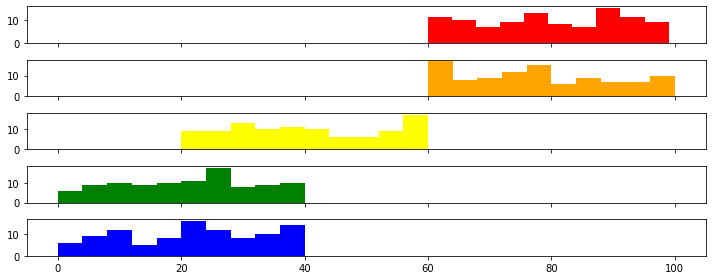

In [21]:
fig, ax = plt.subplots(5,1,figsize=(10,4), sharex=True)
feature = 'nitrogen'
ax[0].hist(tree_df[feature][tree_df['label'] == 'rice'], color = 'red')
ax[1].hist(tree_df[feature][tree_df['label'] == 'maize'], color = 'orange')
ax[2].hist(tree_df[feature][tree_df['label'] == 'chickpea'], color = 'yellow')
ax[3].hist(tree_df[feature][tree_df['label'] == 'kidneybeans'], color = 'green')
ax[4].hist(tree_df[feature][tree_df['label'] == 'mothbeans'], color = 'blue')

plt.tight_layout()
plt.show()

In [19]:
import sklearn.tree as tree

# Extracting feature matrix AND labels.

In [24]:
tree_df.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [29]:
X = tree_df[['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].to_numpy()
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [28]:
y = tree_df['label'].to_numpy()
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

# Build the model.

In [30]:
model = tree.DecisionTreeClassifier()

# Fine-tune the parameters of the model

In [31]:
model.fit(X, y)

DecisionTreeClassifier()

In [32]:
model.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [33]:
model.n_classes_

22

In [34]:
model.n_features_in_

7

In [36]:
model.predict(X)

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

# Separate the training set and the test set

In [37]:
import sklearn.model_selection as model_selection

In [38]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = model_selection.train_test_split(X, y, test_size=.2)

In [42]:
model = tree.DecisionTreeClassifier()

In [43]:
model.fit(X_tree_train, y_tree_train)

DecisionTreeClassifier()

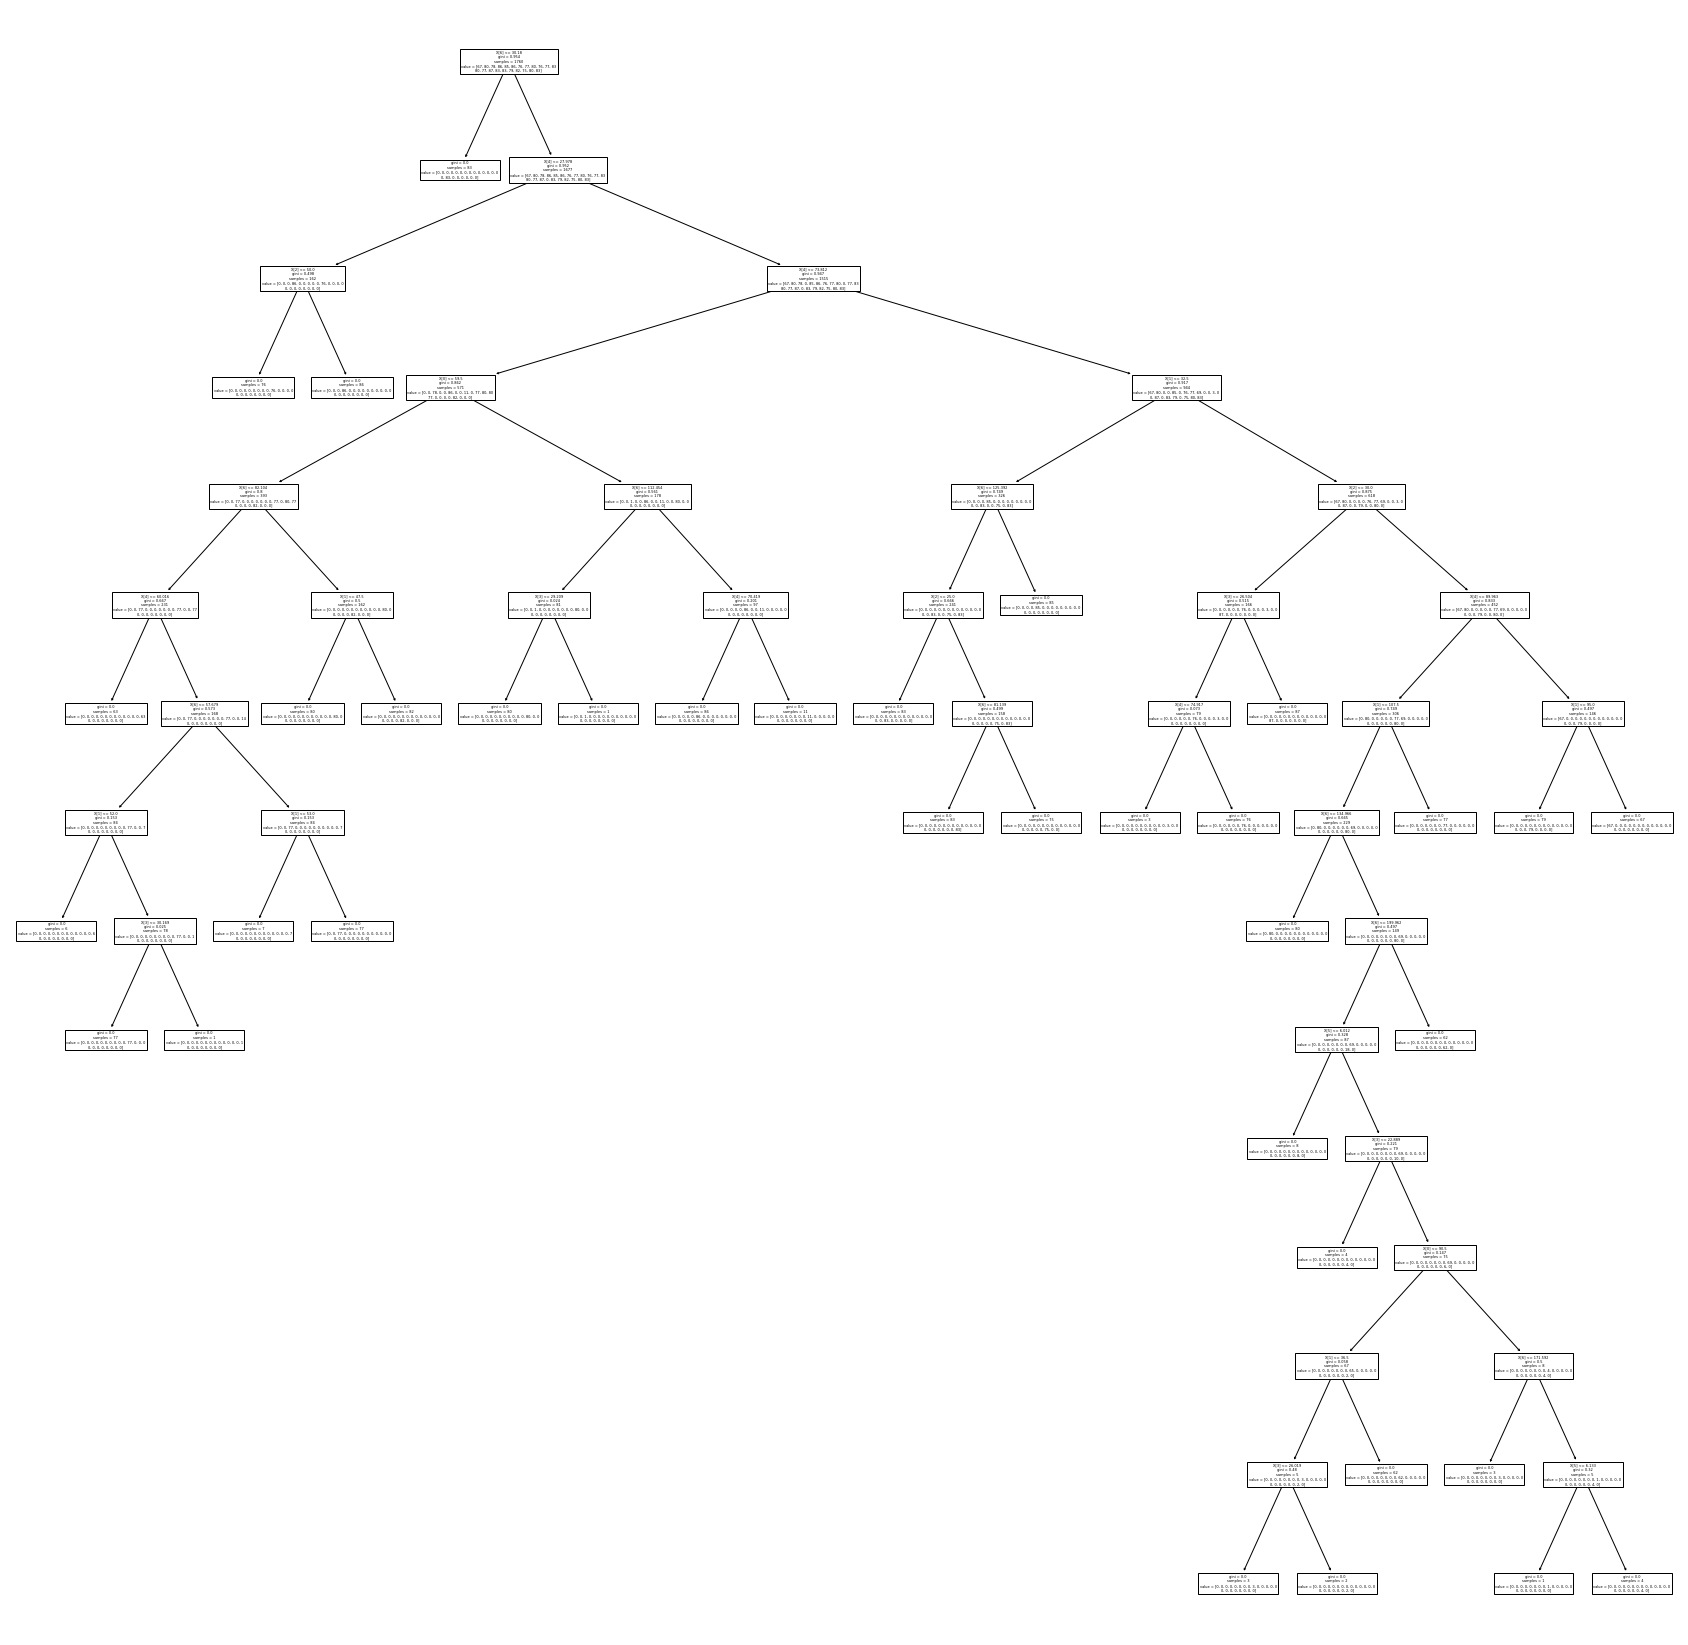

In [58]:
plt.figure(figsize=(30, 30))
plot_tree(model)
plt.show()

In [44]:
model.classes_ #list of arrays of class labels

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [45]:
model.max_features_ #inferred value of max_features.

7

In [52]:
y_tree_pred = model.predict(X_tree_test)
y_tree_pred

array(['chickpea', 'banana', 'apple', 'pigeonpeas', 'maize', 'mothbeans',
       'papaya', 'cotton', 'coffee', 'mango', 'maize', 'papaya',
       'mothbeans', 'grapes', 'pigeonpeas', 'chickpea', 'banana', 'apple',
       'mothbeans', 'jute', 'coconut', 'mango', 'mango', 'mothbeans',
       'pigeonpeas', 'orange', 'pomegranate', 'rice', 'rice', 'jute',
       'watermelon', 'blackgram', 'pigeonpeas', 'jute', 'cotton',
       'kidneybeans', 'pigeonpeas', 'coconut', 'apple', 'mungbean',
       'maize', 'grapes', 'blackgram', 'rice', 'lentil', 'apple',
       'coffee', 'cotton', 'jute', 'maize', 'coffee', 'apple', 'cotton',
       'papaya', 'lentil', 'pigeonpeas', 'mothbeans', 'coconut',
       'mothbeans', 'pigeonpeas', 'banana', 'watermelon', 'mango',
       'coffee', 'chickpea', 'kidneybeans', 'banana', 'kidneybeans',
       'coconut', 'rice', 'pigeonpeas', 'cotton', 'grapes', 'coconut',
       'blackgram', 'blackgram', 'apple', 'papaya', 'pigeonpeas',
       'blackgram', 'apple', 'grape

In [50]:
y_tree_test #correct answers

array(['chickpea', 'banana', 'apple', 'pigeonpeas', 'maize', 'mothbeans',
       'papaya', 'cotton', 'coffee', 'mango', 'maize', 'papaya',
       'mothbeans', 'grapes', 'pigeonpeas', 'chickpea', 'banana', 'apple',
       'mothbeans', 'jute', 'coconut', 'mango', 'mango', 'mothbeans',
       'pigeonpeas', 'orange', 'pomegranate', 'jute', 'rice', 'jute',
       'watermelon', 'blackgram', 'pigeonpeas', 'jute', 'cotton',
       'kidneybeans', 'pigeonpeas', 'coconut', 'apple', 'mungbean',
       'maize', 'grapes', 'blackgram', 'rice', 'lentil', 'apple',
       'coffee', 'cotton', 'jute', 'maize', 'coffee', 'apple', 'cotton',
       'papaya', 'lentil', 'pigeonpeas', 'mothbeans', 'coconut',
       'mothbeans', 'pigeonpeas', 'banana', 'watermelon', 'mango',
       'coffee', 'chickpea', 'kidneybeans', 'banana', 'kidneybeans',
       'coconut', 'rice', 'pigeonpeas', 'cotton', 'grapes', 'coconut',
       'blackgram', 'blackgram', 'apple', 'papaya', 'pigeonpeas',
       'blackgram', 'apple', 'grape

# Compute performance metrics.

In [51]:
import sklearn.metrics as metrics

Accuracy

In [55]:
metrics.accuracy_score(y_tree_test, y_tree_pred)

0.9886363636363636

#### 2.2.2 Load and 'Train' Decision Tree Classifier

In [16]:
# Descision Trees
x = tree_training_df[FEATURES].copy()
y = tree_training_df['label']

dct = DecisionTreeClassifier()
dct.fit(x,y)

DecisionTreeClassifier()

#### 2.2.3 Test Predictions

In [17]:
tree_test_df['prediction'] = dct.predict(tree_test_df[FEATURES])
tree_test_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,prediction
1276,25,129,195,17.986678,81.177121,5.777271,72.371277,grapes,grapes
1446,106,20,51,29.730197,90.970157,6.342573,20.490356,muskmelon,muskmelon
335,33,59,22,22.642369,21.593961,5.947000,122.388601,kidneybeans,kidneybeans
1458,89,9,47,29.471563,90.770696,6.668383,28.752261,muskmelon,muskmelon
2038,62,49,37,24.217446,82.852840,7.479248,166.136589,jute,jute
...,...,...,...,...,...,...,...,...,...
614,21,38,21,29.755389,86.451933,6.637677,37.546027,mungbean,mungbean
885,28,67,21,21.797926,63.730861,6.250994,46.623702,lentil,lentil
1259,17,136,195,41.207336,81.610510,6.389783,65.902275,grapes,grapes
2067,66,58,35,23.564383,79.462831,7.321619,185.259470,jute,jute


#### 2.2.4 Plot Decision Tree

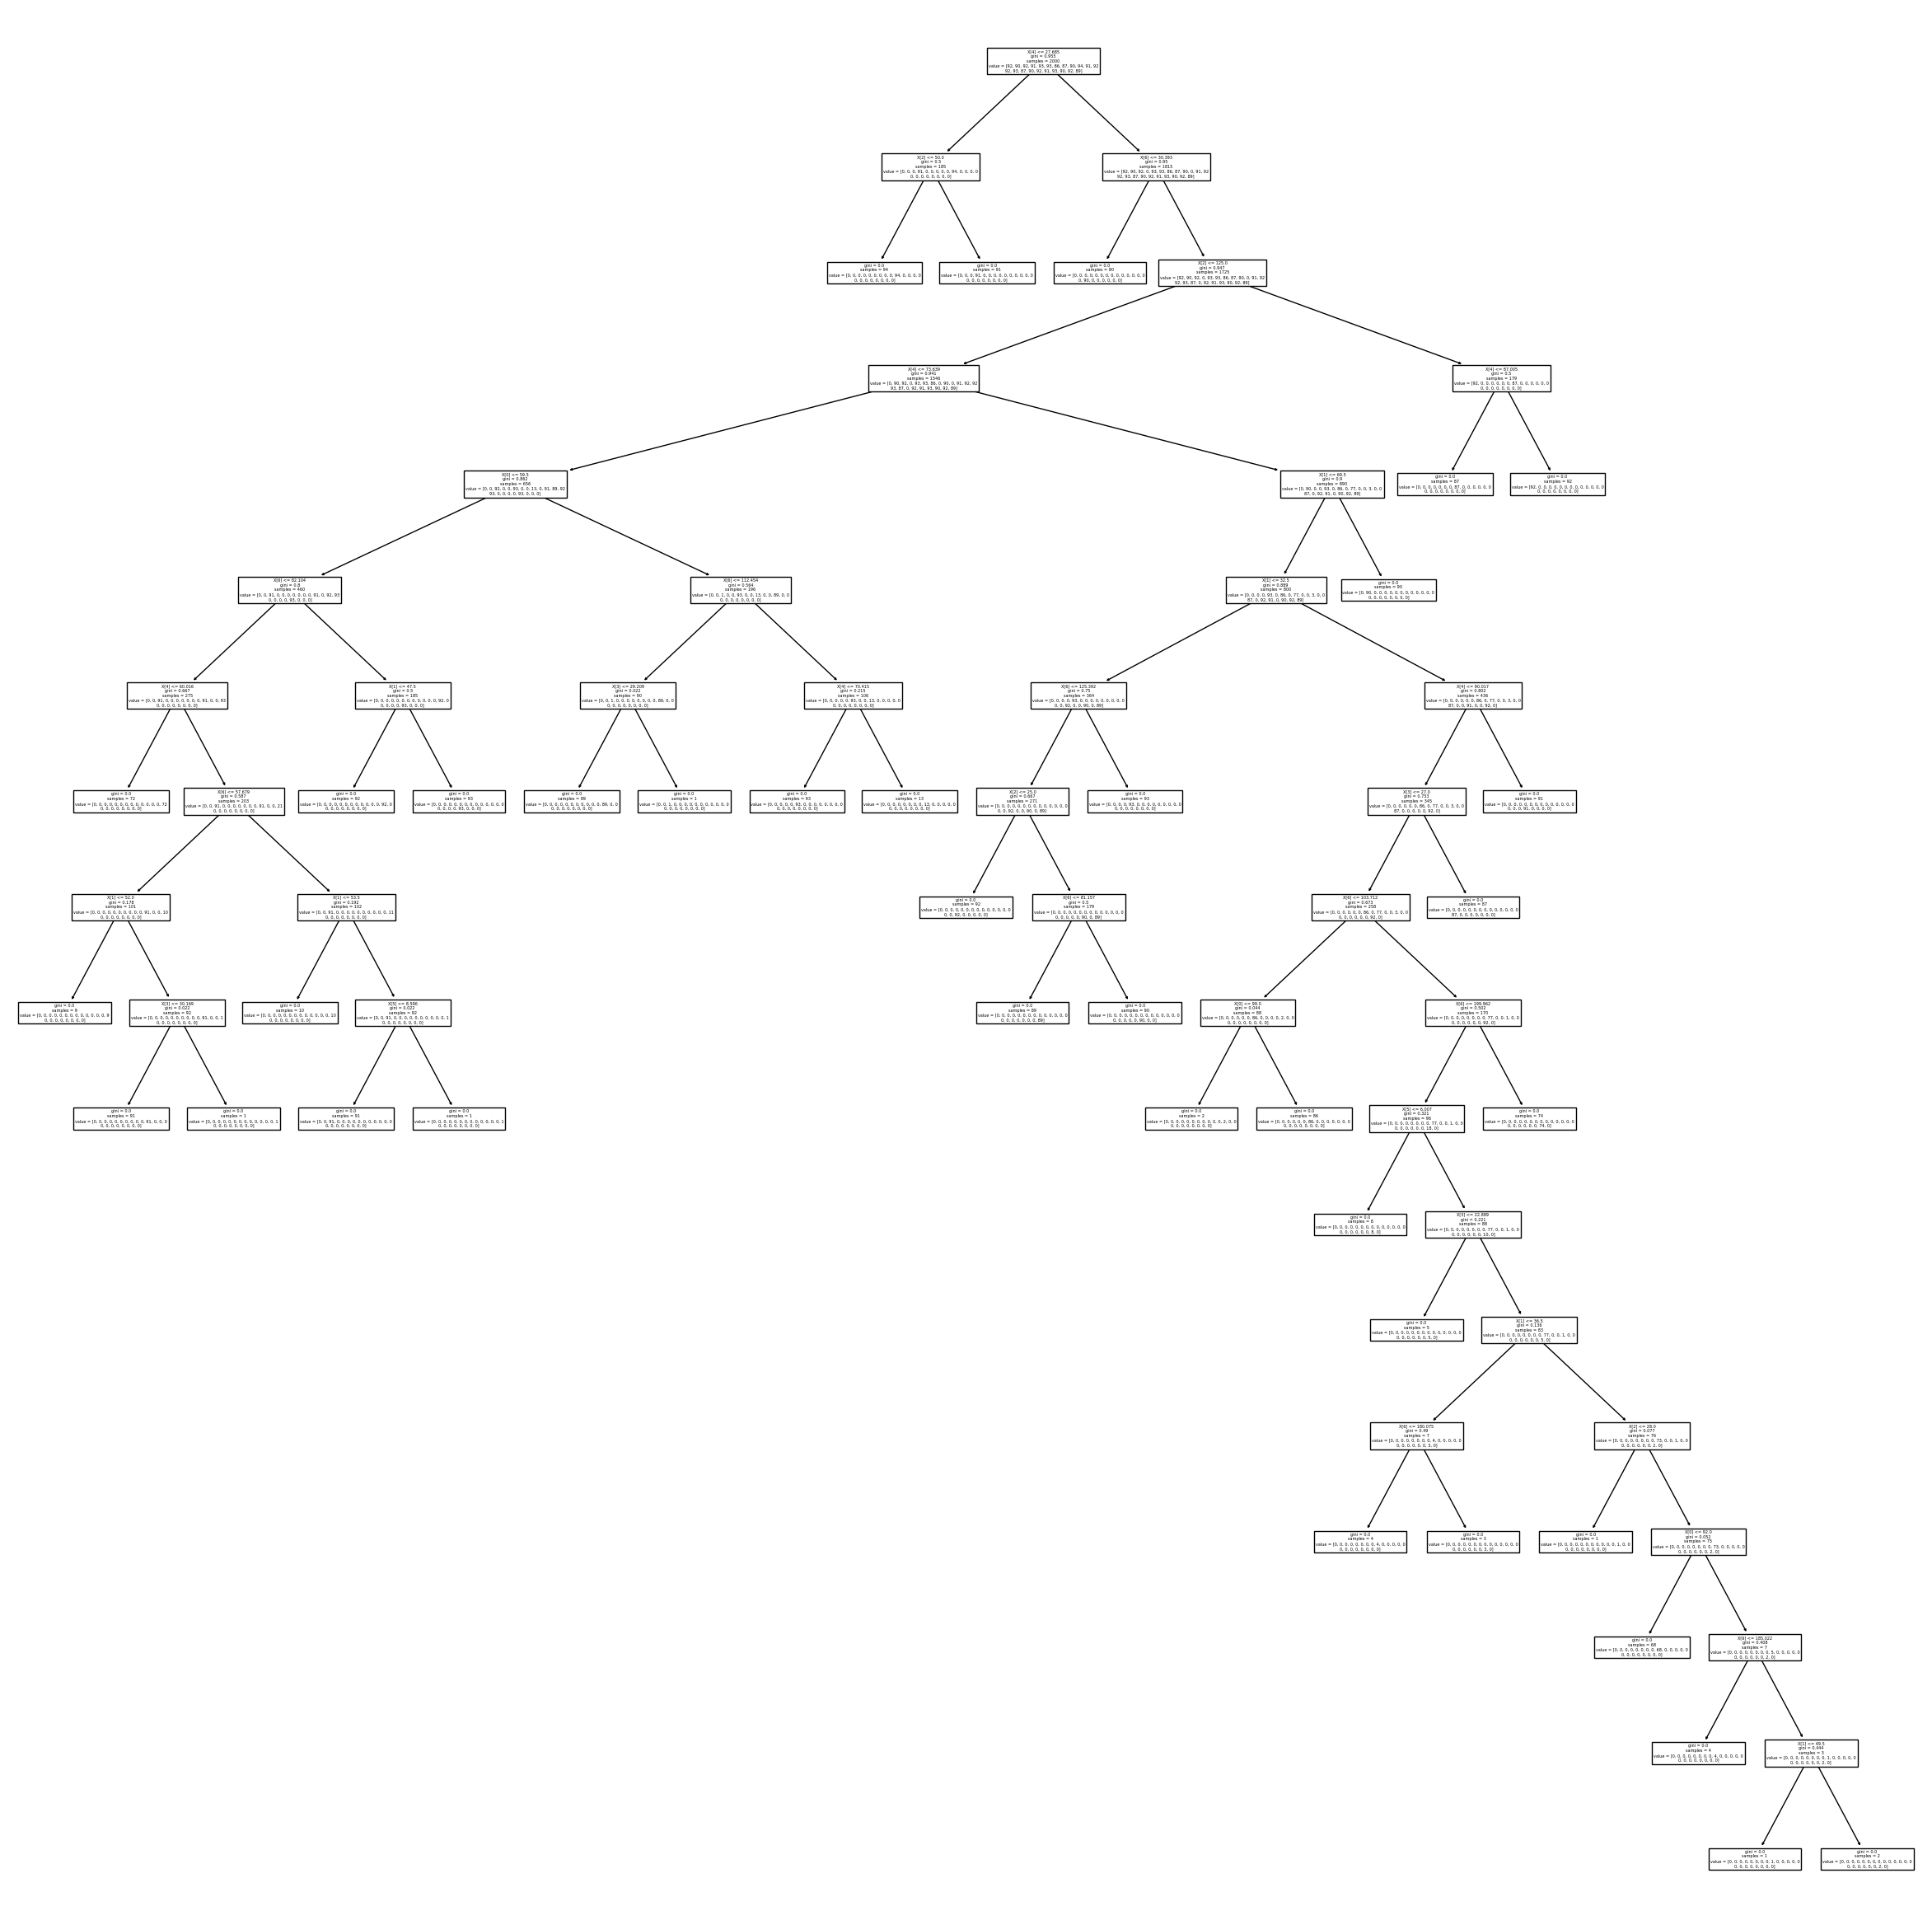

In [18]:
plt.figure(figsize=(30, 30))
plot_tree(dct)
plt.show()

#### 2.2.5 Check Predictions

In [19]:
#Count the number of correctly labelled predictions
count = 0
for index, row in tree_test_df.iterrows():
    if row['label'] == row['prediction']:
        count += 1
print("Correct Predictions: {count:d}/{total:d} ({rate:.2f})".format(count=count, total=len(tree_test_df), rate=count/len(tree_test_df)))

Correct Predictions: 197/200 (0.98)
